# Visualizing Results from AutoEncoder Training

## Libraries

In [1]:
from keras.models import load_model
from keras import backend as K
from imageio import mimwrite

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import gc

%matplotlib inline

Using TensorFlow backend.


## Create Directory if not exists

In [2]:
base_path = os.path.join('docs', 'autoencoder')
if not os.path.exists(base_path):
    os.mkdir(base_path)

## Visualizing Training Results

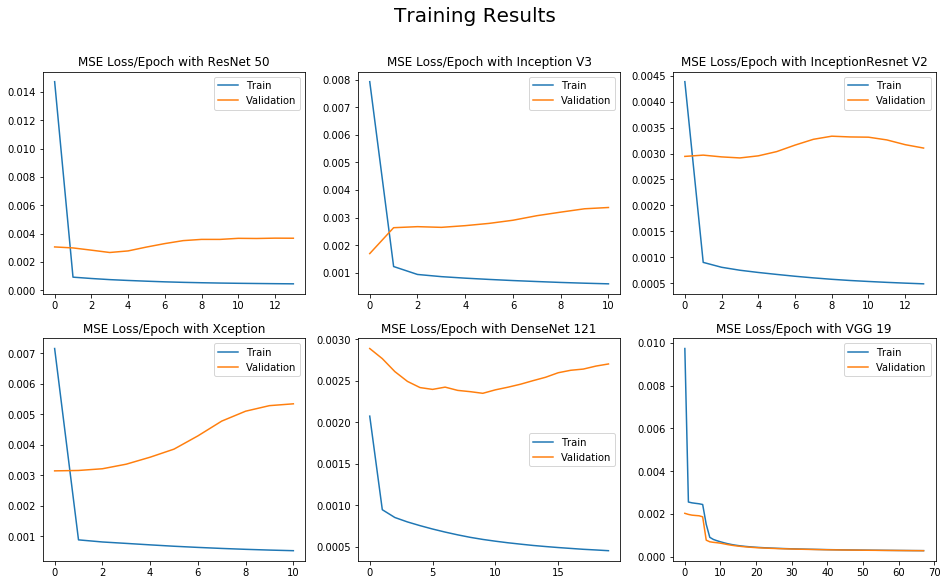

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.suptitle('Training Results', fontsize=20)
fig.set_figwidth(16)
fig.set_figheight(9)

ax[0, 0].set_title('MSE Loss/Epoch with ResNet 50')
df = pd.read_csv(os.path.join('logs', 'ae_resnet.csv'))
ax[0, 0].plot(df['loss'], label='Train')
ax[0, 0].plot(df['val_loss'], label='Validation')
del df
ax[0, 0].legend()

ax[0, 1].set_title('MSE Loss/Epoch with Inception V3')
df = pd.read_csv(os.path.join('logs', 'ae_inception.csv'))
ax[0, 1].plot(df['loss'], label='Train')
ax[0, 1].plot(df['val_loss'], label='Validation')
del df
ax[0, 1].legend()

ax[0, 2].set_title('MSE Loss/Epoch with InceptionResnet V2')
df = pd.read_csv(os.path.join('logs', 'ae_inceptionresnet.csv'))
ax[0, 2].plot(df['loss'], label='Train')
ax[0, 2].plot(df['val_loss'], label='Validation')
del df
ax[0, 2].legend()

ax[1, 0].set_title('MSE Loss/Epoch with Xception')
df = pd.read_csv(os.path.join('logs', 'ae_xception.csv'))
ax[1, 0].plot(df['loss'], label='Train')
ax[1, 0].plot(df['val_loss'], label='Validation')
del df
ax[1, 0].legend()

ax[1, 1].set_title('MSE Loss/Epoch with DenseNet 121')
df = pd.read_csv(os.path.join('logs', 'ae_densenet.csv'))
ax[1, 1].plot(df['loss'], label='Train')
ax[1, 1].plot(df['val_loss'], label='Validation')
del df
ax[1, 1].legend()

ax[1, 2].set_title('MSE Loss/Epoch with VGG 19')
df = pd.read_csv(os.path.join('logs', 'ae_vgg.csv'))
ax[1, 2].plot(df['loss'], label='Train')
ax[1, 2].plot(df['val_loss'], label='Validation')
del df
ax[1, 2].legend()

gc.collect()
plt.savefig(os.path.join(base_path, 'results.png'))

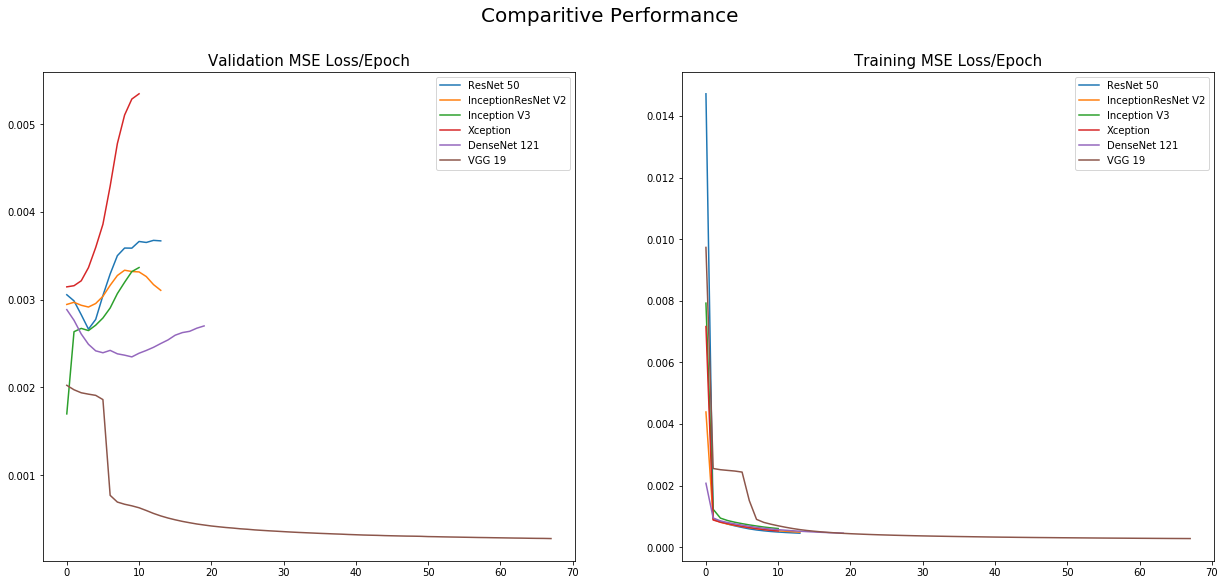

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Comparitive Performance', fontsize=20)
fig.set_figwidth(21)
fig.set_figheight(9)

ax[0].set_title('Validation MSE Loss/Epoch', fontsize=15)
ax[1].set_title('Training MSE Loss/Epoch', fontsize=15)

df = pd.read_csv(os.path.join('logs', 'ae_resnet.csv'))
ax[0].plot(df['val_loss'], label='ResNet 50')
ax[1].plot(df['loss'], label='ResNet 50')
del df

df = pd.read_csv(os.path.join('logs', 'ae_inceptionresnet.csv'))
ax[0].plot(df['val_loss'], label='InceptionResNet V2')
ax[1].plot(df['loss'], label='InceptionResNet V2')
del df

df = pd.read_csv(os.path.join('logs', 'ae_inception.csv'))
ax[0].plot(df['val_loss'], label='Inception V3')
ax[1].plot(df['loss'], label='Inception V3')
del df

df = pd.read_csv(os.path.join('logs', 'ae_xception.csv'))
ax[0].plot(df['val_loss'], label='Xception')
ax[1].plot(df['loss'], label='Xception')
del df

df = pd.read_csv(os.path.join('logs', 'ae_densenet.csv'))
ax[0].plot(df['val_loss'], label='DenseNet 121')
ax[1].plot(df['loss'], label='DenseNet 121')
del df

df = pd.read_csv(os.path.join('logs', 'ae_vgg.csv'))
ax[0].plot(df['val_loss'], label='VGG 19')
ax[1].plot(df['loss'], label='VGG 19')
del df

ax[0].legend()
ax[1].legend()

gc.collect()
plt.savefig(os.path.join(base_path, 'performance.png'))

## Examples

In [5]:
def build_autoencoder(key):
    preprocess = None
    model = None
    model_d = {'densenet': 'dn121', 'inceptionresnet': 'irv2',
               'inception': 'iv3', 'resnet': 'r50',
               'vgg': 'vgg', 'xception': 'x'}
    if key == 'densenet':
        from models.densenet import get_autoencoder, get_preprocess
    elif key == 'inceptionresnet':
        from models.inceptionresnet import get_autoencoder, get_preprocess
    elif key == 'inception':
        from models.inception import get_autoencoder, get_preprocess
    elif key == 'resnet':
        from models.resnet import get_autoencoder, get_preprocess
    elif key == 'vgg':
        from models.vgg import get_autoencoder, get_preprocess
    else:
        from models.xception import get_autoencoder, get_preprocess

    model_path = os.path.join('weights', 'ae_{}.h5'.format(key))
    model = load_model(model_path)
    return (model, get_preprocess())

## Sample Image

In [6]:
path = os.path.join('data', 'autoencode')
path = os.path.join(path, 'valid')
normal_path = os.path.join(path, '0003.npz')
cancer_path = os.path.join(path, '0004.npz')
normal = np.load(normal_path)['data']
cancer = np.load(cancer_path)['data']

meta_file = open(os.path.join('meta', 'ae_meta.json'), 'r')
min_max = json.load(meta_file)
meta_file.close()

mimwrite(os.path.join(base_path, 'normal.gif'),
         ((normal - normal.min()) * 255 / normal.ptp()).astype('uint8'))

mimwrite(os.path.join(base_path, 'cancer.gif'),
         ((cancer - cancer.min()) * 255 / cancer.ptp()).astype('uint8'))

normal = (normal - min_max['min']) * 255.0 / (min_max['max'] - min_max['min'])
normal = np.expand_dims(normal, axis=-1)
normal = np.repeat(normal, 3, axis=-1)

cancer = (cancer - min_max['min']) * 255.0 / (min_max['max'] - min_max['min'])
cancer = np.expand_dims(cancer, axis=-1)
cancer = np.repeat(cancer, 3, axis=-1)

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer.gif) | ![Normal](docs/autoencoder/normal.gif) |

### ResNet 50

In [7]:
K.clear_session()
model, preprocess = build_autoencoder('resnet')
pred_normal = model.predict(preprocess(normal))[:,:,:,0]
pred_cancer = model.predict(preprocess(cancer))[:,:,:,0]

mimwrite(os.path.join(base_path, 'normal-resnet.gif'),
         ((pred_normal - pred_normal.min()) * 255 / pred_normal.ptp()).astype('uint8'))
    
mimwrite(os.path.join(base_path, 'cancer-resnet.gif'),
         ((pred_cancer - pred_cancer.min()) * 255 / pred_cancer.ptp()).astype('uint8'))

del model, preprocess

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer-resnet.gif) | ![Normal](docs/autoencoder/normal-resnet.gif) |

### VGG 19

In [8]:
K.clear_session()
model, preprocess = build_autoencoder('vgg')
pred_normal = model.predict(preprocess(normal))[:,:,:,0]
pred_cancer = model.predict(preprocess(cancer))[:,:,:,0]

mimwrite(os.path.join(base_path, 'normal-vgg.gif'),
         ((pred_normal - pred_normal.min()) * 255 / pred_normal.ptp()).astype('uint8'))
    
mimwrite(os.path.join(base_path, 'cancer-vgg.gif'),
         ((pred_cancer - pred_cancer.min()) * 255 / pred_cancer.ptp()).astype('uint8'))

del model, preprocess

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer-vgg.gif) | ![Normal](docs/autoencoder/normal-vgg.gif) |

### Inception V3

In [9]:
K.clear_session()
model, preprocess = build_autoencoder('inception')
pred_normal = model.predict(preprocess(normal))[:,:,:,0]
pred_cancer = model.predict(preprocess(cancer))[:,:,:,0]

mimwrite(os.path.join(base_path, 'normal-inception.gif'),
         ((pred_normal - pred_normal.min()) * 255 / pred_normal.ptp()).astype('uint8'))
    
mimwrite(os.path.join(base_path, 'cancer-inception.gif'),
         ((pred_cancer - pred_cancer.min()) * 255 / pred_cancer.ptp()).astype('uint8'))

del model, preprocess

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer-inception.gif) | ![Normal](docs/autoencoder/normal-inception.gif) |

### InceptionResNet V2

In [10]:
K.clear_session()
model, preprocess = build_autoencoder('inceptionresnet')
pred_normal = model.predict(preprocess(normal))[:,:,:,0]
pred_cancer = model.predict(preprocess(cancer))[:,:,:,0]

mimwrite(os.path.join(base_path, 'normal-inceptionresnet.gif'),
         ((pred_normal - pred_normal.min()) * 255 / pred_normal.ptp()).astype('uint8'))
    
mimwrite(os.path.join(base_path, 'cancer-inceptionresnet.gif'),
         ((pred_cancer - pred_cancer.min()) * 255 / pred_cancer.ptp()).astype('uint8'))

del model, preprocess

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer-inceptionresnet.gif) | ![Normal](docs/autoencoder/normal-inceptionresnet.gif) |

### DenseNet 121

In [11]:
K.clear_session()
model, preprocess = build_autoencoder('densenet')
pred_normal = model.predict(preprocess(normal))[:,:,:,0]
pred_cancer = model.predict(preprocess(cancer))[:,:,:,0]

mimwrite(os.path.join(base_path, 'normal-densenet.gif'),
         ((pred_normal - pred_normal.min()) * 255 / pred_normal.ptp()).astype('uint8'))
    
mimwrite(os.path.join(base_path, 'cancer-densenet.gif'),
         ((pred_cancer - pred_cancer.min()) * 255 / pred_cancer.ptp()).astype('uint8'))

del model, preprocess

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer-densenet.gif) | ![Normal](docs/autoencoder/normal-densenet.gif) |

### Xception

In [12]:
K.clear_session()
model, preprocess = build_autoencoder('xception')
pred_normal = model.predict(preprocess(normal))[:,:,:,0]
pred_cancer = model.predict(preprocess(cancer))[:,:,:,0]

mimwrite(os.path.join(base_path, 'normal-xception.gif'),
         ((pred_normal - pred_normal.min()) * 255 / pred_normal.ptp()).astype('uint8'))
    
mimwrite(os.path.join(base_path, 'cancer-xception.gif'),
         ((pred_cancer - pred_cancer.min()) * 255 / pred_cancer.ptp()).astype('uint8'))

del model, preprocess

#### Images
| Cancer Patient | Normal Patient |
| :---: | :---: |
| ![Cancer](docs/autoencoder/cancer-xception.gif) | ![Normal](docs/autoencoder/normal-xception.gif) |